In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from scipy.stats import zscore

Import dataset using pandas library

In [ ]:
data = pd.read_csv('/content/labDataset.csv')
data.head()

,Customer ID,Age,Gender,Product Category,Purchase Amount,Payment Method,Feedback,Loyalty Points,Membership Level
0,101,35.0,Male,Electronics,500.0,Credit Card,Great service!,100.0,Gold
1,102,28.0,Female,Clothing,600.0,Cash,NaN,50.0,NaN
2,103,NaN,Female,Food,300.0,Online Payment,Not satisfied,NaN,Bronze
3,104,35.0,Male,Electronics,500.0,Credit Card,Great service!,100.0,Gold
4,105,28.0,Female,Clothing,600.0,Cash,NaN,50.0,NaN


check duplicate value

In [ ]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
dtype: bool

see shapes and datatypes

In [ ]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer ID       20 non-null     int64  
 1   Age               17 non-null     float64
 2   Gender            18 non-null     object 
 3   Product Category  19 non-null     object 
 4   Purchase Amount   18 non-null     float64
 5   Payment Method    19 non-null     object 
 6   Feedback          11 non-null     object 
 7   Loyalty Points    16 non-null     float64
 8   Membership Level  13 non-null     object 
dtypes: float64(3), int64(1), object(5)
memory usage: 1.5+ KB


In [ ]:
data.isnull().sum()

Customer ID         0
Age                 3
Gender              2
Product Category    1
Purchase Amount     2
Payment Method      1
Feedback            9
Loyalty Points      4
Membership Level    7
dtype: int64

handle missing values of Age,Purchase Amount,Loyalty Points by using median technique

In [ ]:
data[['Age','Purchase Amount','Loyalty Points']]=data[['Age','Purchase Amount','Loyalty Points']].fillna(data[['Age','Purchase Amount','Loyalty Points']].median())
data

,Customer ID,Age,Gender,Product Category,Purchase Amount,Payment Method,Feedback,Loyalty Points,Membership Level
0,101,35.0,Male,Electronics,500.0,Credit Card,Great service!,100.0,Gold
1,102,28.0,Female,Clothing,600.0,Cash,NaN,50.0,NaN
2,103,29.0,Female,Food,300.0,Online Payment,Not satisfied,80.0,Bronze
3,104,35.0,Male,Electronics,500.0,Credit Card,Great service!,100.0,Gold
4,105,28.0,Female,Clothing,600.0,Cash,NaN,50.0,NaN
5,106,31.0,Other,Electronics,800.0,Cash,NaN,80.0,Bronze
6,107,45.0,Male,NaN,450.0,NaN,Excellent experience,150.0,Gold
7,108,38.0,Female,Clothing,475.0,Credit Card,NaN,70.0,NaN
8,109,29.0,NaN,Beauty,350.0,Online Payment,Poor customer service,90.0,Bronze
9,110,28.0,Female,Clothing,600.0,Cash,NaN,50.0,NaN


Handle missing values of Gender,Product Category, Payment Method and Membership Label by using Mode technique.

In [ ]:
gen = data['Gender'].mode()[0]
prodct = data['Product Category'].mode()[0]
payment = data['Payment Method'].mode()[0]
mem = data['Membership Level'].mode()[0]

In [ ]:
data['Gender'] = data['Gender'].fillna(gen)
data['Product Category'] = data['Product Category'].fillna(prodct)
data['Payment Method'] = data['Payment Method'].fillna(payment)
data['Membership Level'] = data['Membership Level'].fillna(mem)

In [ ]:
data

In [ ]:
data['Feedback'] = data['Feedback'].fillna(method = 'pad') #Handle Feedback using padding
data

,Customer ID,Age,Gender,Product Category,Purchase Amount,Payment Method,Feedback,Loyalty Points,Membership Level
0,101,35.0,Male,Electronics,500.0,Credit Card,Great service!,100.0,Gold
1,102,28.0,Female,Clothing,600.0,Cash,Great service!,50.0,Bronze
2,103,29.0,Female,Food,300.0,Online Payment,Not satisfied,80.0,Bronze
3,104,35.0,Male,Electronics,500.0,Credit Card,Great service!,100.0,Gold
4,105,28.0,Female,Clothing,600.0,Cash,Great service!,50.0,Bronze
5,106,31.0,Other,Electronics,800.0,Cash,Great service!,80.0,Bronze
6,107,45.0,Male,Clothing,450.0,Cash,Excellent experience,150.0,Gold
7,108,38.0,Female,Clothing,475.0,Credit Card,Excellent experience,70.0,Bronze
8,109,29.0,Female,Beauty,350.0,Online Payment,Poor customer service,90.0,Bronze
9,110,28.0,Female,Clothing,600.0,Cash,Poor customer service,50.0,Bronze


In [ ]:
data['Gender'].unique()

In [ ]:
data.isnull().sum()

Customer ID         0
Age                 0
Gender              0
Product Category    0
Purchase Amount     0
Payment Method      0
Feedback            0
Loyalty Points      0
Membership Level    0
dtype: int64

Lebel Encode (Product Category,Payment Method & Gender)

In [ ]:
le = LabelEncoder()
data['Product Category']= le.fit_transform(data['Product Category'])
data['Payment Method']= le.fit_transform(data['Payment Method'])
data['Gender']= le.fit_transform(data['Gender'])
#data['Payment Method'].unique()
data

,Customer ID,Age,Gender,Product Category,Purchase Amount,Payment Method,Feedback,Loyalty Points,Membership Level
0,101,35.0,1,2,500.0,1,Great service!,100.0,Gold
1,102,28.0,0,1,600.0,0,Great service!,50.0,Bronze
2,103,29.0,0,3,300.0,2,Not satisfied,80.0,Bronze
3,104,35.0,1,2,500.0,1,Great service!,100.0,Gold
4,105,28.0,0,1,600.0,0,Great service!,50.0,Bronze
5,106,31.0,2,2,800.0,0,Great service!,80.0,Bronze
6,107,45.0,1,1,450.0,0,Excellent experience,150.0,Gold
7,108,38.0,0,1,475.0,1,Excellent experience,70.0,Bronze
8,109,29.0,0,0,350.0,2,Poor customer service,90.0,Bronze
9,110,28.0,0,1,600.0,0,Poor customer service,50.0,Bronze


OneHot Encode (Feedback & Memvership Level)

In [ ]:
oneHot = pd.get_dummies(data = data, columns = ['Feedback','Membership Level'], prefix = "One_hot")

oneHot

,Customer ID,Age,Gender,Product Category,Purchase Amount,Payment Method,Loyalty Points,One_hot_Excellent experience,One_hot_Great service!,One_hot_Not satisfied,One_hot_Poor customer service,One_hot_Bronze,One_hot_Gold
0,101,35.0,1,2,500.0,1,100.0,0,1,0,0,0,1
1,102,28.0,0,1,600.0,0,50.0,0,1,0,0,1,0
2,103,29.0,0,3,300.0,2,80.0,0,0,1,0,1,0
3,104,35.0,1,2,500.0,1,100.0,0,1,0,0,0,1
4,105,28.0,0,1,600.0,0,50.0,0,1,0,0,1,0
5,106,31.0,2,2,800.0,0,80.0,0,1,0,0,1,0
6,107,45.0,1,1,450.0,0,150.0,1,0,0,0,0,1
7,108,38.0,0,1,475.0,1,70.0,1,0,0,0,1,0
8,109,29.0,0,0,350.0,2,90.0,0,0,0,1,1,0
9,110,28.0,0,1,600.0,0,50.0,0,0,0,1,1,0


In [ ]:
data['Gender'].unique()

array([1, 0, 2])

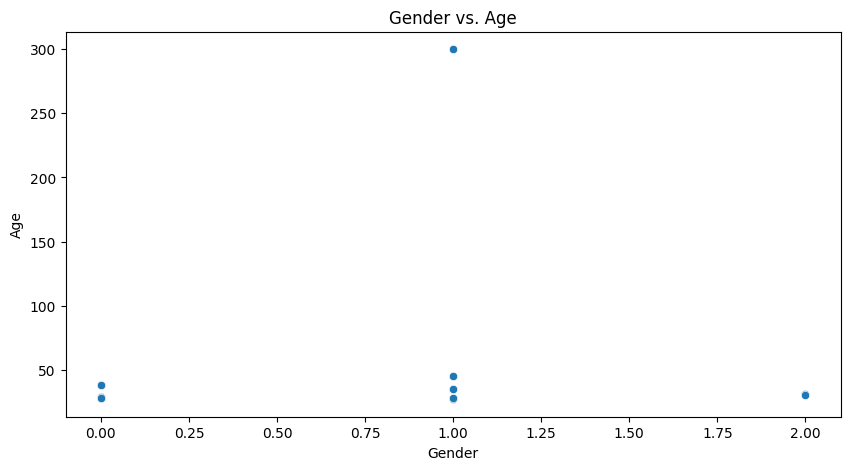

In [ ]:
#See outliers
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Gender", y="Age", data=data)
plt.xlabel("Gender")
plt.ylabel("Age")
plt.title("Gender vs. Age")
plt.show()

Remove Outliers

In [ ]:
z_scores = zscore(oneHot["Age"])
z_score_threshold = 2

outlier_indices = np.where(np.abs(z_scores) > z_score_threshold)[0]

cleaned_data = oneHot[abs(z_scores) < z_score_threshold]
cleaned_data

see preprocessed data with 5 meaningful attributes

In [ ]:
X = cleaned_data.drop(columns=["Purchase Amount"])
y = cleaned_data["Purchase Amount"]
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]

# Task 9: Show the preprocessed dataset
preprocessed_dataset = cleaned_data[selected_features]
print("\nPreprocessed Dataset:\n", preprocessed_dataset)

KeyError: ignored